---
# PHY426 Practical 5 / Assignment 2 
---

This assignment will be due at 12:00 pm EST on Monday February 22nd.

Your solution to each question will be graded for correctness as well as for the readability of your code (including comments, appropriate labels on figures, etc). 10% of the grade will be based on comments/readability/graph labels.

Reading: CH5 to p. 172. Skip section 5.4.

# Recall from Lecture 5: Numerical integration

* Integrals -> areas under curves.
* Approximate these areas in terms of simple shapes (rectangles, trapezoids, rectangles with parabolic tops)

![From Newman, composite of figs. 5.1 and 5.2.](RecTrapSimp.png)

## Trapezoidal rule

* The trapezoidal rule is based on approximating an integrand with straight line segments.

## Simpson's rule

* Simpson's rule uses quadratics instead of straight lines.

## Newton-Cotes formulas

### General idea

Trapezoid and Simpson's Rules are actually just examples of a more general set of integration rules, the Newton-Cotes (N-C) formulas.
* The underlying idea of these methods is to break your interval into small **equal** (!) sub-intervals,
* then to approximate your function by a polynomial of some degree, e.g. 
    * 0 for mid-point rule (that's just summing all elements and multiplying by $h$)
    * 1 for Trapezoidal rule,
    * 2 for Simpson's rule
on that sub-interval.
* this class of methods leads to Newton-Cotes (N-C) formulas.

### General Newton-Cotes formula

* The Newton-Cotes formulas can all be written in the form:
$$\int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k).$$
* $w_k$: the set of "weights".
* $x_k$: "sample points". The sample points are the postions at which we evaluate the integrand, f(x). 
* Notice above we are using $N+1$ points ($N$ slices) to sample.
* For N-C formulas, the sample points are **evenly spaced**.

Notice when the N-C formula will be exact:
* the trapezoidal rule is exact if we are integrating a straight line ($N$ = 1)
* Simpson's rule is exact if we are integrating a quadratic function ($N$ = 2)
* ...and so on for higher degree polynomials  
  
* Newton-Cotes formulas of degree $N$ are exact for polynomials of degree $N$, which require $N+1$ sample points to compute.




### Examples

* All Newton-Cotes formulas can be written in the form:
$$\int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k).$$

**Example: Trapezoidal rule**
$$I(a, b) = h\left[\frac12 f(a) + \frac12f(b) + \sum_{n=1}^{N-1} f(a+kh)\right].$$

* weights:
    * $w_k = h/2$ for $k=1$ or $N+1$,
    * $w_k = h$ otherwise.

**Example: Simpson's rule**
$$I(a,b) = \frac{h}3\left[f(a) + f(b) + 4\sum_{\substack{n\ odd\\ 1\dots{}N}}f(a+kh) + 2\sum_{\substack{n\ even \\ 2\dots{}N-1}}f(a+kh)\right].$$

* weights:
    * $w_k = h/3$ for $k=1$ or $N+1$,
    * $w_k = 4h/3$ for $k=2, 4,\dots{}, N$ (recall: that the number of sample points, $N$, must be even),
    * $w_k = 2h/3$ for $k=3, 5,\dots{}, N-1$,

### Newton-Cotes Weights

Degree | Polynomial | Coefficients
- | - | -
1 (trapezoidal) | Straight line | $\frac{1}{2}, 1, 1,\dots, 1, \frac{1}{2}$
2 (Simpson) | Parabola | $\frac13, \frac43, \frac23, \frac43,\dots, \frac23, \frac43, \frac13$
3 | Cubic | $\frac38, \frac98, \frac98, \frac34, \frac98, \frac98, \frac34, \dots, \frac98, \frac 39$
4 | Quartic | $\frac{14}{45}, \frac{64}{45}, \frac{8}{15}, \frac{64}{45}, \frac{28}{45}, \frac{64}{45},\dots, \frac{64}{45}, \frac{14}{45}$

Questions 1, 2, and 3 will allow you to practice using the Trapezoidal rule and Simpson's rule

---
# Question 1: Error Estimation - Trapezoidal Rule
---

Write a program, or modify an earlier one, to once more calculate
the value of the integral $\int_0^2 (x^4 - 2x + 1) \> dx$, using the trapezoidal rule with $20$ slices, but this time
have the program also print an estimate of the error on the result,
calculated using the method in the lecture notes, $\epsilon_{2} = \frac{1}{3} (I_{2}-I_{1})$.  To do this you will need to
evaluate the integral twice, once with $N_1=10$ slices and then again with
$N_2=20$ slices.  Then $\epsilon_{2} = \frac{1}{3} (I_{2}-I_{1})$ gives the error.  How does the error
calculated in this manner compare with a direct computation of the error as
the difference between your value for the integral and the true value
of 4.4?  Why do the two not agree perfectly?

[4 points]

In [6]:
# Defining our polynomial function
def f(x):
    return x**4 - 2*x + 1


def trapezoid_integral(f, xmin, xmax, N):
    '''
    input: f(x) function, float, float, int
    output: float
    
    Calculates the integral of the function f using the trapezoid method 
    with N slices bounded between xmin and xmax
    '''
    
    # Calculate the h slice size
    h = (xmax-xmin)/float(N)
    
    # Initiate our sum
    trap_sum = 0.5*f(xmin) + 0.5*f(xmax)

    # Then take the sum over the interior points
    for k in range(1,N):
        trap_sum += f(xmin+k*h)
    
    # Lastly, multiply by the width to get the approximate integral
    trap_sum *= h
    
    return trap_sum
    
# Calculate the integrals for 10 and 20 slices    
I_1 = trapezoid_integral(f, 0.0, 2.0, 10)
I_2 = trapezoid_integral(f, 0.0, 2.0, 20)

# Calculate the estimated error between the two integrals
e_2 = (1/3)*(I_2 - I_1)

# Difference between the N=20 value and the real value
true_e = I_2 - 4.4


print("Trapezoid Rule Integration for N = 10: I =", I_1, ', and for N = 20: I =', I_2,)
print("Error between N=20 and N=10 slices: ", e_2)
print("True error in Trapezoid rule integral between N=20 slices and actual value: ", true_e)




Trapezoid Rule Integration for N = 10: I = 4.50656 , and for N = 20: I = 4.426660000000001
Error between N=20 and N=10 slices:  -0.026633333333333137
True error in Trapezoid rule integral between N=20 slices and actual value:  0.026660000000000572


---
# Question 2: The Diffraction Limit of a Telescope - Simpson's Rule
---

Our ability to resolve detail in astronomical observations is limited by the diffraction of light in our telescopes. Light from stars can be treated effectively as coming from a point source at infinity. When such light, with wavelength $\lambda$, passes through the circular aperture of a telescope (which we’ll assume to have unit radius) and is focused by the telescope in the focal plane, it produces not a single dot, but a circular diffraction pattern consisting of central spot surrounded by a series of concentric rings. The intensity of the light in this diffraction pattern is given by:

$I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,$

where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are given by

$J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) \>d\theta,$

where $m$ is a nonnegative integer and $x\ge0$.

(a) Write a Python function `J(m,x)` that calculates the value of $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your function in a program to make a plot, on a single graph, of the Bessel functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to $x=20$.

(b) Make a second program that makes a density plot of the intensity of the circular diffraction pattern of a point light source with $\lambda=500\,$nm, in a square region of the focal plane, using the
  formula given above.  Your picture should cover values of $r$ from zero
  up to about $1\,\mu$m.

**Hint 1**: You may find it useful to know that $\lim_{x\to0}J_1(x)/x = \frac{1}{2}$.  

**Hint 2**: The central spot in the diffraction pattern is so bright that it may be difficult to see the rings around it on the computer screen.  If you run into this problem a simple way to deal with it is to use one of the other color schemes for density plots.  For a more sophisticated solution to the problem, the `imshow` function has an
additional argument `vmax` that allows you to set the value that corresponds to the brightest point in the plot.  For instance, if you say `imshow(x,vmax=0.1)`, then elements in `x` with value 0.1, or any greater value, will produce the brightest (most positive) color on the screen.  By lowering the `vmax` value, you can reduce the total range of values between the minimum and maximum brightness, and hence increase the sensitivity of the plot, making subtle details visible.  (There is also a `vmin` argument that can be used to set the value that corresponds to the dimmest (most negative) color.)  For this exercise a value of `vmax=0.01` appears to work well.

[20 points]

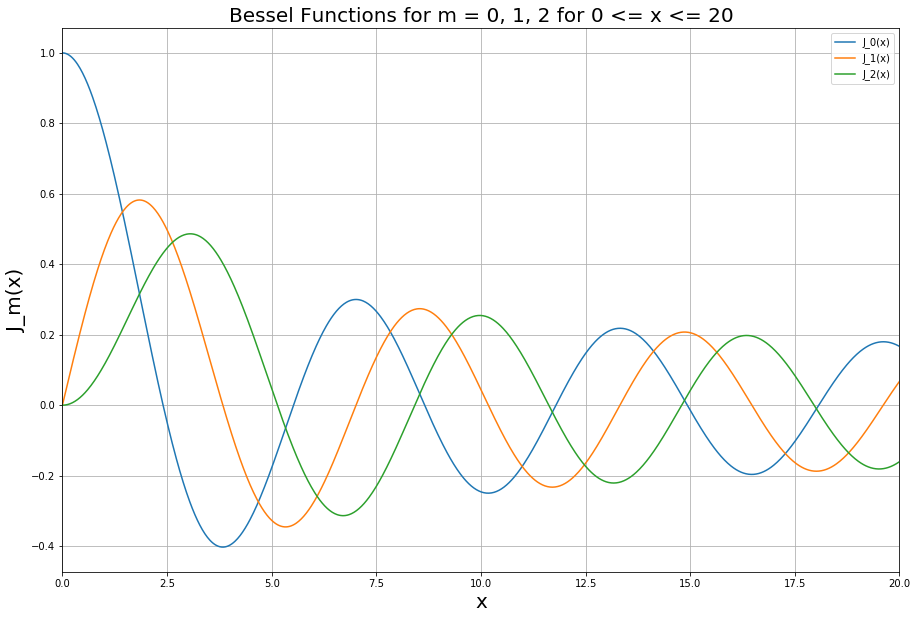

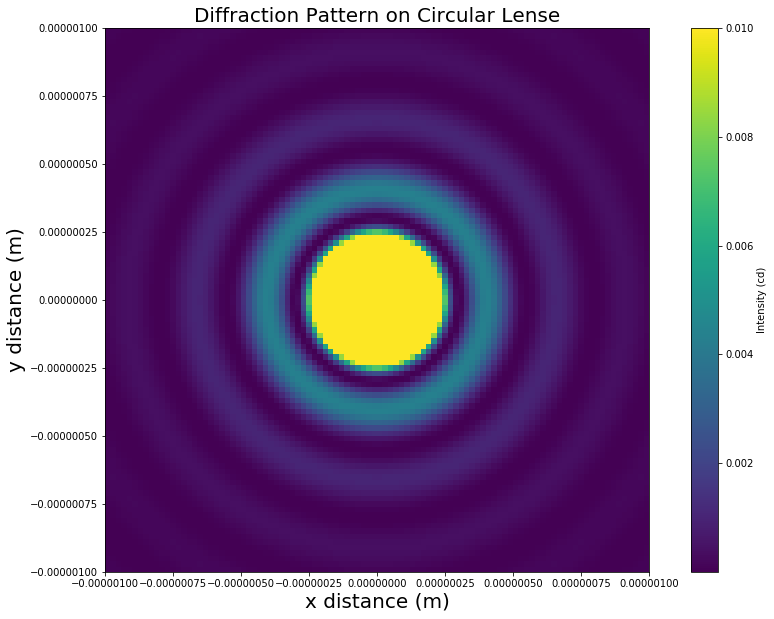

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(m, x, theta):
    '''
    input: int, float, float
    output: float
    
    The integrand for J_m(x) 
    '''
    return (np.cos(m*theta - x*np.sin(theta)))


def J(m, x):
    '''
    input: int, float
    output: float
    
    Calculates the Bessel function for index m and position x.
    '''
    
    # Set up our linear theta space
    N = 1000
    theta, h = np.linspace(0.0, np.pi, N, retstep=True)
    
    # Initiate our integral
    integral = 0
    
    # Add contribution from exterior points
    integral+=f(m, x, theta[0])
    integral+=f(m, x, theta[-1])

    # Add up interior points according to Simpson's rule
    for k in range(1, N-1):
        
        if k%2 == 0:
            integral+= 2.0 * f(m, x, theta[k])
        else:
            integral+= 4.0 * f(m, x, theta[k])
    
    # Finishing off the integral by multiplying by h
    # and then fully calculate the Bessel function by scaling
    # by 1/3pi
    return (1/(3.0*np.pi))*h*integral

def I():
    '''
    Calculates the intensity of light in the diffraction pattern
    for a grid of 100x100 points between (-1e-6,-1e-6) and 
    (1e-6,1e-6) and wavelength 500e-9.
    '''
    
    N = 100
    
    # Defining wavelength and wavenumber
    wavelength = 500e-9
    k = (2*np.pi)/wavelength
    
    # Generate the x and y coordinates
    x_values = np.linspace(-1e-6, 1e-6, N)
    y_values = np.linspace(-1e-6, 1e-6, N)
    
    # Pre-allocate space for our intensity grid
    intensity = np.zeros((N,N))
    
    # Calculate heights with for loops
    for i in range(N):
        for j in range(N):
            r = (x_values[i]**2 + y_values[j]**2)**(1/2)
            intensity[i][j] = (J(1, k*r)/(k*r))**2
            
    return intensity

########################################################################
# a)
########################################################################

# Calculate the first 3 Bessel functions
x = np.linspace(0.0, 20.0, 1000)
J_0 = J(0, x)
J_1 = J(1, x)
J_2 = J(2, x)

# Plotting the functions
fig, ax = plt.subplots(figsize=(15.0,10.0))
plt.plot(x, J_0, label = 'J_0(x)')
plt.plot(x, J_1, label = 'J_1(x)')
plt.plot(x, J_2, label = 'J_2(x)')
plt.title("Bessel Functions for m = 0, 1, 2 for 0 <= x <= 20", fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('J_m(x)', fontsize=20)

plt.xlim(0.0, 20.0)
plt.grid()

plt.legend()
plt.show()

########################################################################
# b)
########################################################################

# Calculating the intensity 
diffraction_pattern = I()
fig, ax = plt.subplots(figsize=(15.0,10.0))

# Display the diffraction pattern through imshow with a colorbar 
im = ax.imshow(diffraction_pattern, cmap='viridis',extent=[-1e-6,1e-6,-1e-6,1e-6], origin='lower', vmax=0.01)
plt.title("Diffraction Pattern on Circular Lense", fontsize=20)
plt.xlabel('x distance (m)', fontsize=20)
plt.ylabel('y distance (m)', fontsize=20)
plt.colorbar(im, label='Intensity (cd)')
plt.show()

---
# Question 3: Errors in Numerical Integration
---

So far, we haven't described a general approach to choosing the number of slices, $N$. A common problem in numerical integration is that we would like to know which value of $N$ will lead to a desired accuracy in our approximated value of the integral. 

In Lecture 5, we made use of the trapezoidal rule for numerical integration. We'll make use of that rule again here, in an extension of this method called the *adaptive trapezoidal rule method*. Here are the steps:

**STEP 1**: Choose an initial number of steps $N$ and decide on the target accuracy for the value of the integral. Calculate the first approximation $I_1$ to the integral using the chosen value of $N$ with the standard trapezoidal rule formula.

**STEP 2**: Double the number of steps and use Equation 5.34:

$I_i = \frac{1}{2}I_{i-1} + h_i \sum\limits_{1 \thinspace ... \thinspace N_i-1 ; k \thinspace odd} f(a+kh_i)$


to calculate an improved estimate of the integral. Also calculate the error on that estimate from Equation 5.30:

$\epsilon_i = \frac{1}{3}(I_i - I_{i-1})$

Here, $I_{i-1}$ is the approximate value of the integral from the previous iteration.

**STEP 3**: If the absolute magnitude of the error is less than the target accuracy for the integral, stop. Otherwise repeat from step 2.

[Note, you can read Newman pages 155 - 159 (up to the end of 5.3) for a derivation of this method. This chapter is available as a pdf file at this link:
http://www-personal.umich.edu/~mejn/cp/chapters/int.pdf]

Write a program that uses the adaptive trapezoidal rule method to calculate the value of this integral:

$I = \int_0^1 \sin^2 \sqrt{100 x} \>dx,$

to an approximate accuracy of $\epsilon=10^{-6}$ (i.e., correct to six digits after the decimal point).  Start with one single integration slice and work up from there to two, four, eight, and so forth.  Have your program print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached.  (Hint: You should find the result is around $I=0.45$.)

[15 points]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    '''
    input: float
    output: float
    '''
    
    return np.sin(np.sqrt(100.0*x))**2

def trapezoid_int(f, xmin, xmax, N):
    '''
    input: f function, float, float, int
    output: float
    
    Calculates the integral of the function f using the trapezoid method 
    with N slices bounded between xmin and xmax
    '''
    
    x, h = np.linspace(xmin, xmax, N, retstep=True)
   
    # Initiate our sum
    trap_sum = 0.5*f(xmin) + 0.5*f(xmax)

    # Then take the sum over the interior points
    for k in range(1,N):
        trap_sum += f(x[k])
    
    # Lastly, multiply by the width to get the approximate integral
    trap_sum *= h
    
    return trap_sum

def improved_int(I ,f, xmin, xmax, N):
    '''
    input: float, f function, float, float, int
    output: float
    
    Calculates a more accurate integral using the original value for the integral
    '''
    
    # initiate our new integral with half the original integral 
    # value
    new_int = 0.5*I
    
    new_x, new_h = np.linspace(xmin, xmax, N, retstep=True)
    for k in range(1, N-1):
        
        if k%2 != 0:
            new_int += new_h * f(new_x[k])
    
    return new_int
    
def integral_up_to_accuracy(f, xmin, xmax, target_acc):
    '''
    input: f function, float, float, int, float
    output: float
    '''
    
    # Calculate our first integral
    I_0 = trapezoid_int(f, xmin, xmax, 2)
    
    # Double our number of slices and calculate the 
    # second integral
    I = improved_int(I_0, f, xmin, xmax, 4)
    
    # Calculate the accuracy
    e_i = abs((1/3)*(I - I_0))
    print(str(I_0) + " for N = 4 slices with error: " + str(e_i))
    
    N = 4
    while(e_i > target_acc):
        
        I_0 = I
        # Double our number of slices and calculate the 
        # second integral
        N = 2*N
        I = improved_int(I_0, f, xmin, xmax, N)
        
        # Calculate the accuracy
        e_i = (1/3)*(I - I_0)
        print(str(I_0) + " for N = " + str(N) +  " slices with error: " + str(e_i))
    
    return I

I_0 = trapezoid_int(f, 0.0, 1.0, 2)
integral_up_to_accuracy(f, 0.0, 1.0, 1e-6)


0.443938453639956 for N = 4 slices with error: 0.04754011660116279
0.3013181038364676 for N = 8 slices with error: 0.002446638493457868
0.3086580193168412 for N = 16 slices with error: 0.022156182978477674
0.37512656825227425 for N = 32 slices with error: 0.01414368578350772
0.4175576256027974 for N = 64 slices with error: 0.0063061267817384374
0.4364760059480127 for N = 128 slices with error: 0.003022334339471762
0.445543008966428 for N = 256 slices with error: 0.001567898157858997
0.450246703440005 for N = 512 slices with error: 0.0008460385656774057
0.4527848191370372 for N = 1024 slices with error: 0.0004626305133235512
0.4541727106770079 for N = 2048 slices with error: 0.0002532633630210982
0.45493250076607117 for N = 4096 slices with error: 0.0001381404842228743
0.4553469222187398 for N = 8192 slices with error: 7.495816113082623e-05
0.45557179670213227 for N = 16384 slices with error: 4.045639451808839e-05
0.45569316588568654 for N = 32768 slices with error: 2.1725189490599352e-

0.45582950847593534

### What we've done so far: 
 
Newton-Cotes:
* had to use $N$ equally-spaced sampled points.
* $N^{\text{th}}$-order N-C exact for polynomial of degree $N$.
* A $N^{\text{th}}$-order polynomial approximates a well-behaved function better than a $(N-1)^{\text{th}}$-order polynomial, because of the added degree of freedom.

* Methods with evenly spaced points are easy to implement, and it's easy to add new points half way between the old points.

## Gaussian quadrature

Gaussian quadrature is an integration method that uses *unevenly spaced* points. 
*  Why is this useful? -- it can give high accuracy with a smaller number of points (an advantage when computing the integrand is expensive). You can use many FEWER sample points to get the same level of accuracy as a N-C formula.

  
* In this case, we can vary not only the weights of the sample points, but also their locations. $N$ unequally-spaced points $\Rightarrow$ $N$ more degrees of freedom,
* exact for $(2N-1)^{th}$-order polynomial.
* other way to look at it: it will give the same level of accuracy as an approximation by a $(2N-1)^{th}$-order polynomial.

Newman's Ch. 5 goes into details of how to find weights and sample points. It turns out that the ideal location of the sample points coincides with the zeros of Nth Legendre polynomial. 

Remarkably, there is a universal rule to choose the $w_k$ and $x_k$:
* $x_k = $ roots of $n^{th}$ Legendre polynomial $P_N(x)$,
* $\displaystyle w_k = \left[\frac{2}{1-x^2}\left(\frac{dP_N}{dx}\right)^{-2}\right]_{x={x_k}}$.


That there is such a universal rule *is so useful*. The detailed derivation is not needed in the context of this course, but you can find it in Newman Appendix C. 

The above two formulas for the location of the sample points and their respective weights correspond to the case where we are integrating over the interval $[-1,1]$. 

For the general case, that is, integrating over the interval $[a,b]$, we need to scale the location of the sample points and their weights as follows:

(1)  $x_k' = \frac{1}{2}(b - a)x_k + \frac{1}{2}(b + a) $  
(2)  $w_k' = \frac{1}{2}(b - a)w_k $

![From Newman, fig. 5.4: Sample points and weights for Gaussian quadrature. The positions and heights of the bars represent the sample points and their associated weights for Gaussian quadrature with (left) $N=10$ and (right) $N=100$.](GaussianPoints.png)


* You don't need to write you own program to find sample points and weights -- there are already functions written to do this.
* In the cell below you have two functions:
    * `gaussxw` for integration limits from $-1$ to $+1$,
    * `gaussxwab` for integration limits from $a$ to $b$.
* The calculation of weights and points is relatively expensive. Use `gaussxw.py` if you are going to change the limits repeatedly.

In [ ]:
# %load gaussxw
from pylab import *
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Calculate the sample points (roots of the Legendre polynomial) using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w



In [2]:
from pylab import *
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    # x = Cos(Pi * (4 * i + 3) / (4 * n + 2))
    a = linspace(3,4*N-1,N)/(4*N+2)
    print(a)
    x = cos(pi*a+1/(8*N*N*tan(a)))
    print(x)
    
    # Calculate the sample points (roots of the Legendre polynomial) using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        # Makes an array of ones.
        p0 = ones(N,float)
        # Returns an array copy of the given object.
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

gaussxw(5)
gaussxwab(5, 0.0, 78)

[0.13636364 0.31818182 0.5        0.68181818 0.86363636]
[ 0.89389415  0.52780848 -0.00915231 -0.54581275 -0.91139876]
[0.13636364 0.31818182 0.5        0.68181818 0.86363636]
[ 0.89389415  0.52780848 -0.00915231 -0.54581275 -0.91139876]


(array([74.34101399, 60.00030309, 39.        , 17.99969691,  3.65898601]),
 array([ 9.24014852, 18.66651815, 22.18666667, 18.66651815,  9.24014852]))

In [3]:
# Example: Let's try to integrate the same function we looked at in Lecture 5:

def f(x):
    return x**4 - 2*x + 1

N = 3
a = 0.0
b = 2.0

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])
print(wp*f(xp))
print(s)

# How does this compare to our result with the Trapezoidal rule & Simpson's rule?

[0.21428571 0.5        0.78571429]
[ 0.74047591 -0.0254207  -0.79041   ]
[ 4.09345852e+00 -1.97372982e-16  3.06541475e-01]
4.4000000000000075


**Pros**
* complicated error formula, but in general: approximation error improves by a factor $const./N^2$ when you increase # of sample points by 1
* e.g., going form $N=10$ to $N=11$ sample points improves your estimate by a factor of $\sim 100$ $\Rightarrow$ converge very quickly to true value of the integral.

**Cons**
* only works well if function is reasonably smooth (since sample points are farther apart),
* unlike N-C methods, hard to get an estimate of the error.

### Exercise 1:

Compute $\displaystyle \int_{-1}^{1} \left[x^4 + \sin(x^2)\right]dx$ using Gaussian quadrature.

First, let's see what is going on with sympy, Python's symbolic math package:

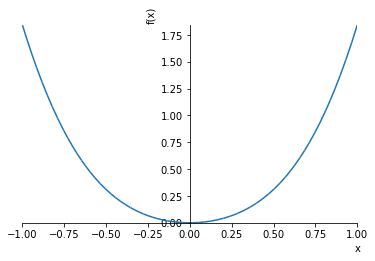

In [13]:
from sympy import *
init_printing()
x = symbols('x', real=True)
f = x**4 + sin(x**2)
plotting.plot(f, (x, -1, 1))

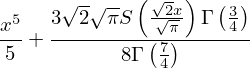

In [14]:
# Integrate f
integrate(f, x)

In [15]:
# from -1 to +1
res=integrate(f, (x, -1, +1))
# Numerical evaluation
N(res)

Now, we could do this as long as the function has an analytical expression that `sympy` (or Maple, Mathematica, Wolfram Alpha...) know how to solve.

Let's try doing this with Gaussian quadrature.

In [16]:
# First, write your pseudocode here:

# pseudo-code

# Use Newman's functions for gaussxw
# Load numpy
# define function
# define N
# call gausswx for xi, wi
# initialize integral to 0.
# loop over sample points to compute integral
# print

In [9]:
# Next, write your commented code here:

from pylab import *
import numpy as np

# define function
def f(x):
    """this is the integrand"""
    return x**4 + np.sin(x**2)

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

# define N
N = 1000
# call gausswx for xi, wi
x, w = gaussxw(N)

# initialize integral to 0.
I = 0.
# loop over sample points to compute integral
for k in range(N):
    I += w[k]*f(x[k])
# print
print(I)

# How does your result compare to what we found above with sympy?

error = abs(1.02053660344676 - I)/1.02053660344676

print(error)

1.0205366034467613
1.305457957167423e-15


---
# Question 4: Heat Capacity of a Solid
---

Debye's theory of solids gives the heat capacity of a solid at temperature $T$ to be

$C_V = 9V\rho k_B \biggl( {T\over\theta_D} \biggr)^3 \int_0^{\theta_D/T}
      {x^4 e^x\over(e^x-1)^2}\>dx,$

where $V$ is the volume of the solid, $\rho$ is the number density of atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called Debye temperature, a property of solids that depends on their density and speed of sound.

* Write a Python function `cv(T)` that calculates $C_V$ for a given value of the temperature, for a sample consisting of 1000 cubic centimeters of solid aluminum, which has a number density of $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature of $\theta_D=428\,$K.  

* Use Gaussian quadrature to evaluate the integral, with $N=50$ sample points. Use your function to make a graph of the heat capacity as a function of temperature from $T=5\,$K to $T=500\,$K.

Hint: Use `expm1` from the `math` module, which is a function that provides greater precision than exp(x) - 1 for small values of x.

[15 points]

In [4]:
# Example pseudocode:

# import all of the relevant functions
# define the constants
# call gaussxw
# define a function for the integrand
# define a function to compute Cv (integrating and then multiplying by the constants)
# plot the graph


Text(0,0.5,'Heat Capacity (J/K)')

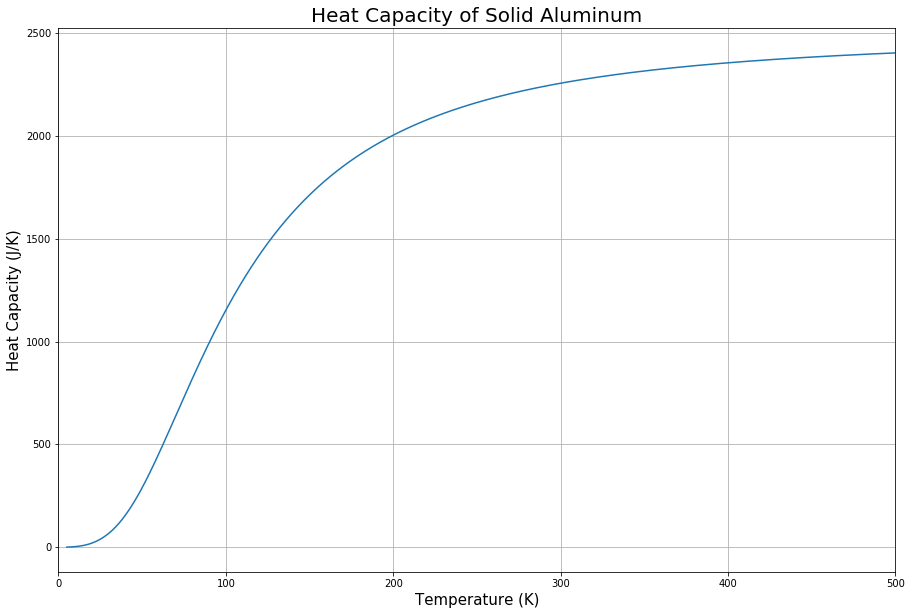

In [14]:
from math import expm1
from pylab import *
import scipy.constants as constants
import numpy as np
import matplotlib.pyplot as plt


# Declaring all constants. Boltzman constant found in 
# scipy.constants
V = 1000e-6
p = 6.022e28
theta_D = 428
N = 50

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def integrand(x):
    return (x**4 * exp(x))/(expm1(x)**2)


def cv(T):
    '''
    input: float
    output: float
    '''
    
    # Define the bounds of our integration
    a = 0.0
    b = theta_D/T

    # call gausswx for xi, wi
    x, w = gaussxwab(N, a, b)
    
    # Perform the integration
    C_V = 0.0
    for k in range(N):
        C_V += w[k]*integrand(x[k])

    C_V = (9.0*V*p*constants.k)*((T/theta_D)**3)*C_V
    
    return C_V

temps = np.linspace(5, 500, 1000)
heat_capacities = np.zeros(temps.size) 

for i in range(temps.size):
    heat_capacities[i] = cv(temps[i])

fig,ax = plt.subplots(figsize=(15.0,10.0))
plt.plot(temps, heat_capacities, label = 'J_0(x)')
plt.title("Heat Capacity of Solid Aluminum", fontsize = 20)
plt.grid()
plt.xlim(0,500)
plt.xlabel('Temperature (K)', fontsize = 15)
plt.ylabel('Heat Capacity (J/K)', fontsize = 15) 